## Census Income Data Set - Part 2

This notebook includes part 2 of Census Income DataSet analysis. In this section a detailed model building is done using different boosting and bagging algorithms to check which algorithm works best on this dataset.

In the part 1 section of Census Income DataSet analysis a detailed EDA is performed along with model building.

You can check the part 1 analysis from the link given below:
* https://www.linkedin.com/posts/vinit-londhe21_adult-census-income-classification-activity-6995454703786446848-f-0N?utm_source=share&utm_medium=member_desktop

### Attribute Information:

Listing of attributes:

1. **>50K, <=50K.**
2. age: continuous.
3. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
4. fnlwgt: continuous.
5. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,    10th, Doctorate, 5th-6th, Preschool.
6. education-num: continuous.
7. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
8. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-    inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
9. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
10. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
11. sex: Female, Male.
12. capital-gain: continuous.
13. capital-loss: continuous.
14. hours-per-week: continuous.
15. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### ML Algorithms used:
* Decision Tree Classifier
* Random Forest Classifier
* Bagging Classifier
* Voting Classifier
* Extra Trees Classifier
* AdaBoost Classifier
* Gradient Boosting Classifier
* XGBoost Classifier

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("census_income_cleaned.csv")

In [3]:
# Display first five records of the data
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,3,2491,1,1,0,1,4,1,24,0,8,38,0
1,33,2,2727,1,0,3,0,4,1,0,0,0,38,0
2,21,1,13188,3,2,5,1,4,1,0,0,8,38,0
3,36,1,14354,3,0,5,0,2,1,0,0,8,38,0
4,11,1,18120,1,0,9,5,2,0,0,0,8,4,0


In [4]:
# Display last five records of the data
df.tail()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
30157,10,1,15471,0,0,12,5,4,0,0,0,6,38,0
30158,23,1,7555,3,0,6,0,4,1,0,0,8,38,1
30159,41,1,7377,3,3,0,4,4,0,0,0,8,38,0
30160,5,1,12060,3,1,0,3,4,1,0,0,0,38,0
30161,35,2,16689,3,0,3,5,4,0,107,0,8,38,1


In [5]:
# Number of rows and columns
df.shape

(30162, 14)

In [6]:
df['income'].unique()

array([0, 1], dtype=int64)

In [7]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   workclass       30162 non-null  int64
 2   fnlwgt          30162 non-null  int64
 3   education       30162 non-null  int64
 4   marital-status  30162 non-null  int64
 5   occupation      30162 non-null  int64
 6   relationship    30162 non-null  int64
 7   race            30162 non-null  int64
 8   sex             30162 non-null  int64
 9   capital-gain    30162 non-null  int64
 10  capital-loss    30162 non-null  int64
 11  hours-per-week  30162 non-null  int64
 12  native-country  30162 non-null  int64
 13  income          30162 non-null  int64
dtypes: int64(14)
memory usage: 3.2 MB


In [8]:
# Statistical Summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,21.407201,13.034537,0.0,11.00,20.0,30.00,59.0
workclass,30162.0,1.402394,0.725132,0.0,1.00,1.0,2.00,3.0
fnlwgt,30162.0,9814.025065,5651.384187,0.0,5025.25,9689.5,14520.75,19494.0
education,30162.0,3.757742,2.641574,0.0,2.00,3.0,6.00,8.0
marital-status,30162.0,0.746403,0.833972,0.0,0.00,1.0,1.00,3.0
occupation,30162.0,5.959850,4.029566,0.0,2.00,6.0,9.00,13.0
relationship,30162.0,1.418341,1.601338,0.0,0.00,1.0,3.00,5.0
race,30162.0,3.678602,0.834709,0.0,4.00,4.0,4.00,4.0
sex,30162.0,0.675685,0.468126,0.0,0.00,1.0,1.00,1.0
capital-gain,30162.0,6.552450,23.284819,0.0,0.00,0.0,0.00,117.0


In [9]:
df['income'].value_counts()

0    22654
1     7508
Name: income, dtype: int64

In [10]:
# Check duplicate if any
df.duplicated().sum()

47

In [11]:
# Drop duplicates
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(30115, 14)

## Split the data into X & y

In [14]:
# Independent and Dependent Features
X=df.drop(['income'],axis=1)
y=df['income']

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.33, random_state = 42)

## Model 1: Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()

In [17]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
dt_model.score(X_train,y_train)

0.9999008772364574

In [19]:
y_pred_dt = dt_model.predict(X_test)

In [20]:
predictions_1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})    
predictions_1.head()

,Actual,Predicted
6761,0,0
22062,0,0
9397,0,0
4347,1,1
8609,0,0


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [22]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

0.8026765948883076

[Text(821.8704044117648, 757.1571428571428, 'marital-status <= 0.5\ngini = 0.372\nsamples = 20177\nvalue = [15186, 4991]\nclass = 0'),
 Text(489.78860294117646, 640.6714285714286, 'capital-gain <= 77.0\ngini = 0.493\nsamples = 9695\nvalue = [5405, 4290]\nclass = 0'),
 Text(292.33455882352945, 524.1857142857143, 'capital-loss <= 43.5\ngini = 0.478\nsamples = 8934\nvalue = [5396, 3538]\nclass = 0'),
 Text(164.11764705882354, 407.7, 'education <= 2.5\ngini = 0.466\nsamples = 8454\nvalue = [5330, 3124]\nclass = 0'),
 Text(82.05882352941177, 291.21428571428567, 'education <= 0.5\ngini = 0.496\nsamples = 2202\nvalue = [1002, 1200]\nclass = 1'),
 Text(41.029411764705884, 174.7285714285714, 'age <= 17.5\ngini = 0.473\nsamples = 650\nvalue = [401, 249]\nclass = 0'),
 Text(20.514705882352942, 58.24285714285713, '\n  (...)  \n'),
 Text(61.544117647058826, 58.24285714285713, '\n  (...)  \n'),
 Text(123.08823529411765, 174.7285714285714, 'capital-gain <= 49.5\ngini = 0.475\nsamples = 1552\nvalue = 

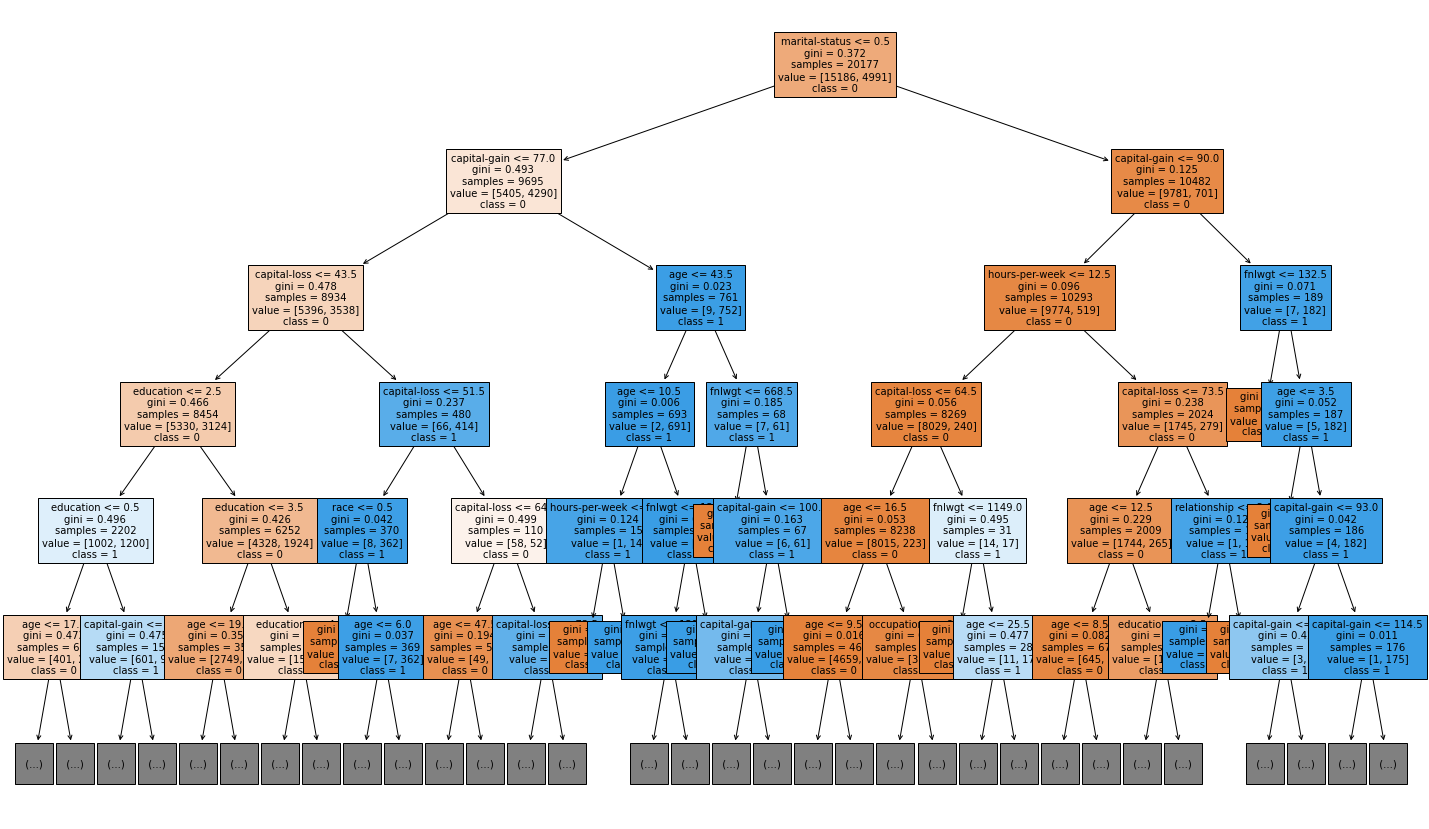

In [27]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dt_model,max_depth=5,filled=True,class_names=[str(i) for i in set(y_train)],feature_names=X_train.columns,fontsize=10)

In [28]:
path = dt_model.cost_complexity_pruning_path(X_train,y_train)
ccp_alpha = path.ccp_alphas

In [29]:
path

{'ccp_alphas': array([0.00000000e+00, 2.09682769e-05, 2.33230032e-05, ...,
        1.53192383e-02, 2.43742767e-02, 7.04377096e-02]),
 'impurities': array([9.91227635e-05, 1.41059317e-04, 2.34351330e-04, ...,
        2.77534940e-01, 3.01909217e-01, 3.72346926e-01])}

In [30]:
ccp_alpha

array([0.00000000e+00, 2.09682769e-05, 2.33230032e-05, ...,
       1.53192383e-02, 2.43742767e-02, 7.04377096e-02])

In [31]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(X_train,y_train)
    dt_model2.append(dt_m)

In [32]:
# finding training acc. for each of the models
train_score = [i.score(X_train,y_train) for i in dt_model2]

In [33]:
# finding testing acc. for each of the models
test_score = [i.score(X_test,y_test) for i in dt_model2]

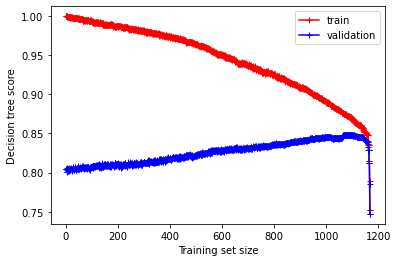

In [34]:
plt.plot(train_score,'r-+',label='train')
plt.plot(test_score,'b-+',label='validation')
plt.xlabel('Training set size')
plt.ylabel('Decision tree score')
plt.legend()

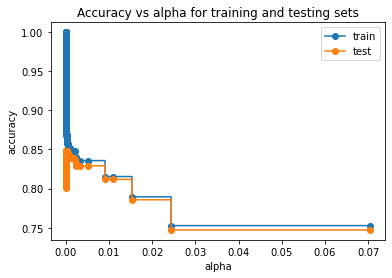

In [35]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alpha,train_score,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alpha,test_score,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [36]:
dt_model_ccp = DecisionTreeClassifier(random_state=40,ccp_alpha=0.01)
dt_model_ccp.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=40)

[Text(620.0, 951.3000000000001, 'X[4] <= 0.5\ngini = 0.372\nsamples = 20177\nvalue = [15186, 4991]'),
 Text(372.0, 679.5, 'X[9] <= 77.0\ngini = 0.493\nsamples = 9695\nvalue = [5405, 4290]'),
 Text(248.0, 407.70000000000005, 'X[10] <= 43.5\ngini = 0.478\nsamples = 8934\nvalue = [5396, 3538]'),
 Text(124.0, 135.89999999999998, 'gini = 0.466\nsamples = 8454\nvalue = [5330, 3124]'),
 Text(372.0, 135.89999999999998, 'gini = 0.237\nsamples = 480\nvalue = [66, 414]'),
 Text(496.0, 407.70000000000005, 'gini = 0.023\nsamples = 761\nvalue = [9, 752]'),
 Text(868.0, 679.5, 'X[9] <= 90.0\ngini = 0.125\nsamples = 10482\nvalue = [9781, 701]'),
 Text(744.0, 407.70000000000005, 'gini = 0.096\nsamples = 10293\nvalue = [9774, 519]'),
 Text(992.0, 407.70000000000005, 'gini = 0.071\nsamples = 189\nvalue = [7, 182]')]

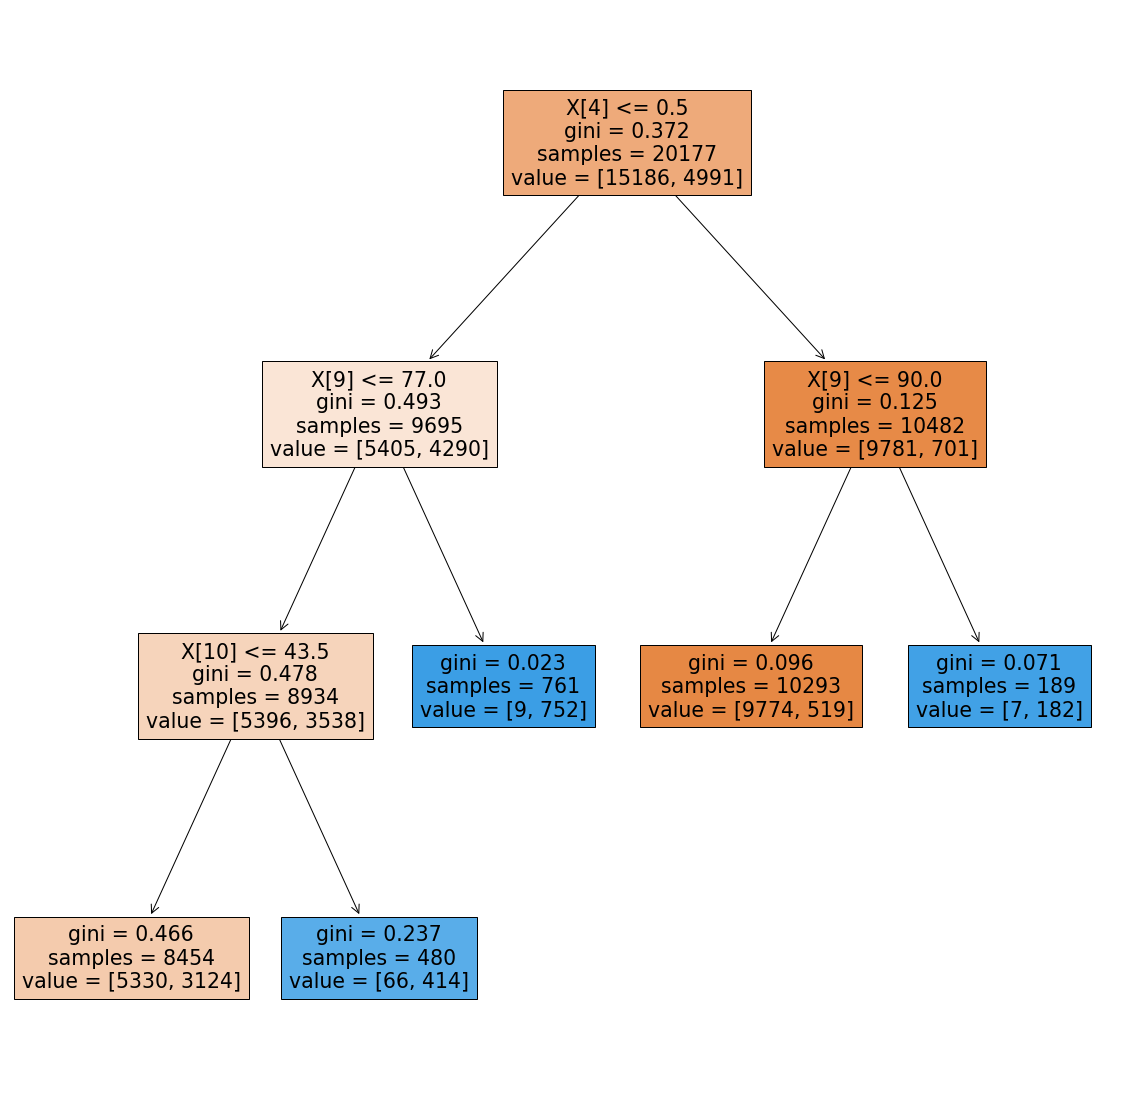

In [37]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [38]:
dt_model_ccp.score(X_train,y_train)

0.8153838529018189

In [39]:
y_pred_dt_ccp = dt_model_ccp.predict(X_test)

In [41]:
accuracy_dt_ccp = accuracy_score(y_test,y_pred_dt_ccp)
accuracy_dt_ccp

0.8117327430066412

In [43]:
# Hyperparameter Tuning
grid_param = {"criterion":['gini','entropy'],
              "splitter":['best','random'],
              "max_depth":range(2,40,1),
              "min_samples_split":range(2,10,1),
              "min_samples_leaf":range(1,10,1),
              "ccp_alpha":np.random.rand(20)
              }

In [44]:
from sklearn.model_selection import GridSearchCV
grid_ccp = GridSearchCV(estimator=dt_model_ccp, param_grid=grid_param, cv=5, n_jobs=-1)

In [45]:
grid_ccp.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.01, random_state=40),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.29816725, 0.59575375, 0.98870751, 0.57382745, 0.18816226,
       0.23493775, 0.52530495, 0.31086078, 0.24164535, 0.00710994,
       0.19997315, 0.66631518, 0.99635782, 0.8802879 , 0.5245456 ,
       0.30498432, 0.45271848, 0.55156524, 0.59695357, 0.77810514]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [46]:
grid_ccp.best_params_

{'ccp_alpha': 0.007109935831345338,
 'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [52]:
dt_ccp_new=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf=1,min_samples_split=2,splitter='best',ccp_alpha=0.01)

In [53]:
dt_ccp_new.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=6)

In [54]:
dt_ccp_new.score(X_train,y_train)

0.825197006492541

In [55]:
y_pred_ccp_new = dt_ccp_new.predict(X_test)

In [56]:
accuracy_ccp_new = accuracy_score(y_test,y_pred_ccp_new)
accuracy_ccp_new

0.8216945059368083

In [57]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_ccp_new)
conf_mat

array([[6881,  544],
       [1228, 1285]], dtype=int64)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ccp_new))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7425
           1       0.70      0.51      0.59      2513

    accuracy                           0.82      9938
   macro avg       0.78      0.72      0.74      9938
weighted avg       0.81      0.82      0.81      9938



In [59]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_ccp_new)
auc

0.7190375166976838

## ROC

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ccp_new)

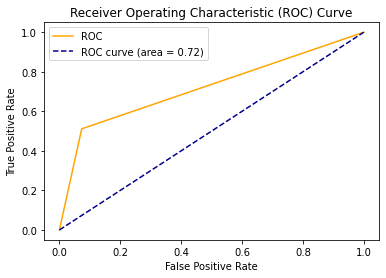

In [61]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance

In [62]:
dt_ccp_new.feature_importances_

array([0.04331496, 0.        , 0.        , 0.05126953, 0.54951437,
       0.        , 0.        , 0.        , 0.        , 0.29261104,
       0.06329009, 0.        , 0.        ])

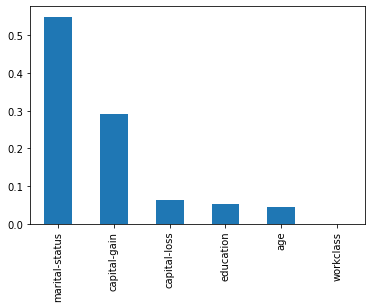

In [63]:
feat_importances = pd.Series(dt_ccp_new.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## Model 2: Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier
Rf_model=RandomForestClassifier()

In [18]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
y_pred_rf = Rf_model.predict(X_test)

In [20]:
Rf_model.score(X_train,y_train)

0.9999008772364574

In [21]:
acc_rf = accuracy_score(y_test,y_pred_rf)
acc_rf

0.8484604548198833

In [22]:
# Hyperparameter Tuning
random_grid = {'n_estimators' : [5,10,50,100,120,150],
              'criterion': ['gini', 'entropy'],
              'max_depth' : range(2,20,1),
              'min_samples_leaf' : range(1,10,1),
              'min_samples_split': range(2,10,1),
              'max_features' : ['auto', 'sqrt'],
              'ccp_alpha':np.random.rand(20)
              }

In [23]:
from sklearn.model_selection import RandomizedSearchCV
random_grid_rf=RandomizedSearchCV(estimator=Rf_model,param_distributions=random_grid,n_iter = 10,cv=5,verbose=2,random_state = 42,n_jobs=-1)

In [24]:
random_grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.97740119, 0.4499653 , 0.84218891, 0.96808425, 0.62771469,
       0.43197316, 0.22150882, 0.97768068, 0.7484626 , 0.03367431,
       0.98224824, 0.22234976, 0.51738755, 0.19901732, 0.56141334,
       0.31367872, 0.25890814, 0.94079458, 0.12027755, 0.02273801]),
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 10, 50, 100, 120,
                                                         150]},
                   random_state=42, verbose=2)

In [25]:
random_grid_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 17,
 'criterion': 'entropy',
 'ccp_alpha': 0.9680842507523709}

In [26]:
random_grid_rf.best_score_

0.7526391473025301

In [46]:
Rf_model_new=RandomForestClassifier(n_estimators=50,min_samples_split=8,min_samples_leaf=3,max_features='auto',max_depth=17,criterion='entropy',ccp_alpha=0.01)

In [47]:
Rf_model_new.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=17,
                       min_samples_leaf=3, min_samples_split=8,
                       n_estimators=50)

In [48]:
y_pred_rf_new=Rf_model_new.predict(X_test)

In [49]:
Rf_model_new.score(X_train,y_train)

0.8130544679585667

In [50]:
acc_rf_new = accuracy_score(y_test,y_pred_rf_new)
acc_rf_new

0.80961964177903

In [51]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test,y_pred_rf_new)
conf_mat_rf

array([[7387,   38],
       [1854,  659]], dtype=int64)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf_new))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7425
           1       0.95      0.26      0.41      2513

    accuracy                           0.81      9938
   macro avg       0.87      0.63      0.65      9938
weighted avg       0.84      0.81      0.77      9938



In [88]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_rf_new)
auc

0.6285592628768116

In [62]:
from sklearn.metrics import plot_confusion_matrix

<Figure size 360x360 with 0 Axes>

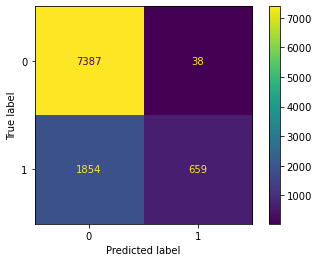

In [63]:
# Confusion matrix display
plt.figure(figsize=(5,5))
plot_confusion_matrix(Rf_model_new, X_test, y_test)  
plt.show()

## ROC

In [87]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_new)

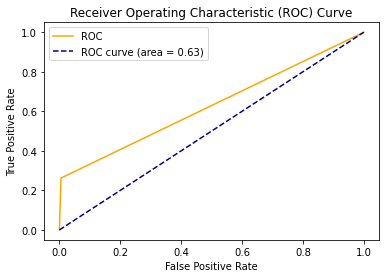

In [89]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance

In [90]:
Rf_model_new.feature_importances_

array([1.10448013e-01, 6.84800558e-04, 0.00000000e+00, 3.37648729e-02,
       3.51507789e-01, 5.08660418e-03, 1.95559383e-01, 1.23573930e-03,
       2.00964572e-02, 1.95847655e-01, 2.84109529e-02, 5.72152225e-02,
       1.42511061e-04])

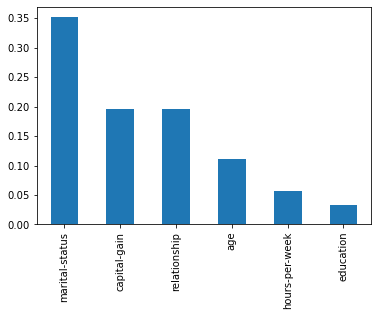

In [91]:
feat_importances = pd.Series(Rf_model_new.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## Model 3: Bagging Classifier

### Using Logistic Regression as base estimator

In [93]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [94]:
bag_log = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=10, random_state=0)

In [95]:
bag_log.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(), random_state=0)

In [96]:
y_pred_bag_log=bag_log.predict(X_test)

In [97]:
acc_bag_log=accuracy_score(y_test,y_pred_bag_log)
acc_bag_log

0.7877842624270477

In [98]:
bag_log.score(X_train,y_train)

0.7932299152500372

In [99]:
# Confusion Matrix
conf_mat_log = confusion_matrix(y_test,y_pred_bag_log)
conf_mat_log

array([[6967,  458],
       [1651,  862]], dtype=int64)

In [100]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_bag_log)
auc

0.6406664067388302

In [101]:
print(classification_report(y_test,y_pred_bag_log))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7425
           1       0.65      0.34      0.45      2513

    accuracy                           0.79      9938
   macro avg       0.73      0.64      0.66      9938
weighted avg       0.77      0.79      0.76      9938



### Using Support Vector Classifier as base estimator

In [102]:
from sklearn.svm import SVC

In [104]:
bag_svc = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
bag_svc.fit(X_train,y_train)
y_pred_bag_svc = bag_svc.predict(X_test)

In [105]:
acc_bag_svc=accuracy_score(y_test,y_pred_bag_svc)
acc_bag_svc

0.7471322197625276

In [106]:
bag_svc.score(X_train,y_train)

0.752639143579323

In [107]:
# Confusion Matrix
conf_mat_svc = confusion_matrix(y_test,y_pred_bag_svc)
conf_mat_svc

array([[7425,    0],
       [2513,    0]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred_bag_svc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7425
           1       0.00      0.00      0.00      2513

    accuracy                           0.75      9938
   macro avg       0.37      0.50      0.43      9938
weighted avg       0.56      0.75      0.64      9938



In [110]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_bag_svc)
auc

0.5

### Using KNN Classifier as base estimator

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
bag_knn= BaggingClassifier(base_estimator=KNeighborsClassifier(6),n_estimators=10, random_state=0)
bag_knn.fit(X_train,y_train)
y_pred_bag_knn = bag_svc.predict(X_test)

In [113]:
acc_bag_knn=accuracy_score(y_test,y_pred_bag_knn)
acc_bag_knn

0.7471322197625276

In [114]:
bag_knn.score(X_train,y_train)

0.830698319869158

In [115]:
# Confusion Matrix
conf_mat_knn = confusion_matrix(y_test,y_pred_bag_knn)
conf_mat_knn

array([[7425,    0],
       [2513,    0]], dtype=int64)

In [116]:
print(classification_report(y_test,y_pred_bag_knn))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      7425
           1       0.00      0.00      0.00      2513

    accuracy                           0.75      9938
   macro avg       0.37      0.50      0.43      9938
weighted avg       0.56      0.75      0.64      9938



In [117]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_bag_knn)
auc

0.5

## Model 4: Voting Classifier

In [122]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

In [123]:
r1 = LogisticRegression()
r2 = DecisionTreeClassifier()
r3 = RandomForestClassifier()

In [124]:
model_vote = VotingClassifier([('lr', r1), ('dt', r2), ('rf', r3)])
model_vote.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('rf', RandomForestClassifier())])

In [125]:
y_pred_vote = model_vote.predict(X_test)

In [126]:
acc_vote=accuracy_score(y_test,y_pred_vote)
acc_vote

0.8362849667941236

In [127]:
model_vote.score(X_train,y_train)

0.9999008772364574

In [129]:
# Confusion Matrix
conf_mat_vote = confusion_matrix(y_test,y_pred_vote)
conf_mat_vote

array([[6926,  499],
       [1128, 1385]], dtype=int64)

In [130]:
print(classification_report(y_test,y_pred_vote))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7425
           1       0.74      0.55      0.63      2513

    accuracy                           0.84      9938
   macro avg       0.80      0.74      0.76      9938
weighted avg       0.83      0.84      0.83      9938



In [133]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_vote)
auc

0.7419643577303745

## Model 5: Extra Trees Classifier

In [134]:
from sklearn.ensemble import ExtraTreesClassifier

In [135]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train,y_train)
y_pred_etc=etc.predict(X_test)

In [136]:
acc_etc=accuracy_score(y_test,y_pred_etc)
acc_etc

0.8370899577379755

In [137]:
etc.score(X_train,y_train)

0.9999008772364574

In [138]:
# Confusion Matrix
conf_mat_etc = confusion_matrix(y_test,y_pred_etc)
conf_mat_etc

array([[6799,  626],
       [ 993, 1520]], dtype=int64)

In [139]:
print(classification_report(y_test,y_pred_etc))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7425
           1       0.71      0.60      0.65      2513

    accuracy                           0.84      9938
   macro avg       0.79      0.76      0.77      9938
weighted avg       0.83      0.84      0.83      9938



In [140]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_etc)
auc

0.7602724954814092

## Feature Importance

In [141]:
etc.feature_importances_

array([0.16741664, 0.02838053, 0.17348454, 0.08897796, 0.08345194,
       0.09792591, 0.07328943, 0.01647122, 0.0258485 , 0.10869479,
       0.03626391, 0.08082332, 0.01897132])

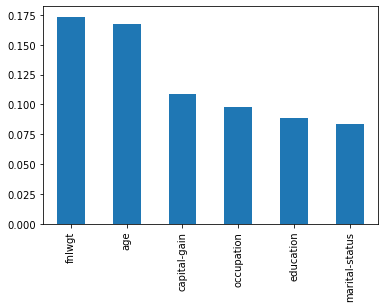

In [142]:
feat_importances = pd.Series(etc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## Model 6: AdaBoost Classifier

In [143]:
from sklearn.ensemble import AdaBoostClassifier

In [144]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train,y_train)
y_pred_ada=model_ada.predict(X_test)

In [145]:
acc_ada = accuracy_score(y_test,y_pred_ada)
acc_ada

0.8477560877440129

In [146]:
model_ada.score(X_train,y_train)

0.8578083956980721

In [147]:
grid_param = {"n_estimators" : [90,100,130,150],
              "learning_rate" : [0.001,0.01,0.1,0.5]
             }

In [148]:
from sklearn.model_selection import GridSearchCV
grid_search_ada=GridSearchCV(estimator=model_ada,param_grid=grid_param,cv=3,verbose=1,n_jobs=-1)

In [149]:
grid_search_ada.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'n_estimators': [90, 100, 130, 150]},
             verbose=1)

In [150]:
grid_search_ada.best_params_

{'learning_rate': 0.5, 'n_estimators': 150}

In [151]:
new_model=AdaBoostClassifier(learning_rate=0.5,n_estimators=150)

In [152]:
new_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=150)

In [153]:
y_pred_new_ada=new_model.predict(X_test)

In [154]:
acc_ada_new = accuracy_score(y_test,y_pred_new_ada)
acc_ada_new

0.8515797947273093

In [156]:
# Confusion Matrix
conf_mat_ada = confusion_matrix(y_test,y_pred_new_ada)
conf_mat_ada

array([[6965,  460],
       [1015, 1498]], dtype=int64)

In [157]:
print(classification_report(y_test,y_pred_new_ada))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7425
           1       0.77      0.60      0.67      2513

    accuracy                           0.85      9938
   macro avg       0.82      0.77      0.79      9938
weighted avg       0.85      0.85      0.85      9938



In [159]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_new_ada)
auc

0.767073708299335

## Feature Importance

In [160]:
new_model.feature_importances_

array([0.08      , 0.00666667, 0.04      , 0.13333333, 0.04      ,
       0.19333333, 0.06      , 0.00666667, 0.03333333, 0.18666667,
       0.17333333, 0.02666667, 0.02      ])

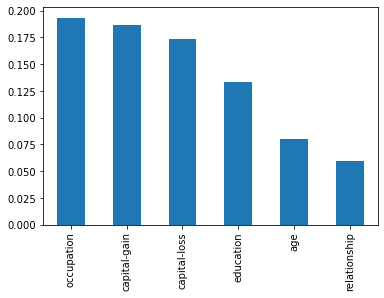

In [161]:
feat_importances = pd.Series(new_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## Model 7: Gradient Boosting Classifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbm=GradientBoostingClassifier()

In [163]:
model_gbm.fit(X_train,y_train)

GradientBoostingClassifier()

In [164]:
y_pred_gbm = model_gbm.predict(X_test)

In [165]:
acc_gbm = accuracy_score(y_test,y_pred_gbm)
acc_gbm

0.8547997585027168

In [166]:
model_gbm.score(X_train,y_train)

0.8661842692174258

In [170]:
# Confusion Matrix
conf_mat_gbm = confusion_matrix(y_test,y_pred_gbm)
conf_mat_gbm

array([[6996,  429],
       [1014, 1499]], dtype=int64)

In [171]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      7425
           1       0.78      0.60      0.68      2513

    accuracy                           0.85      9938
   macro avg       0.83      0.77      0.79      9938
weighted avg       0.85      0.85      0.85      9938



In [172]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_gbm)
auc

0.769360215766901

## Feature Importance

In [173]:
model_gbm.feature_importances_

array([0.0681308 , 0.00101177, 0.00348501, 0.08392973, 0.38326969,
       0.08103311, 0.01639755, 0.00059139, 0.00210942, 0.23172768,
       0.0785316 , 0.04663507, 0.00314719])

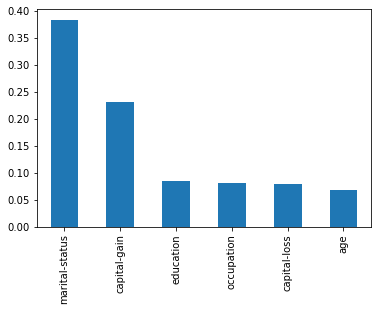

In [174]:
feat_importances = pd.Series(model_gbm.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## Model 8:  XGBoost Classifier

In [176]:
import xgboost

In [177]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()

In [178]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [179]:
y_pred_xgb=model_xgb.predict(X_test)

In [180]:
acc_xgb = accuracy_score(y_test,y_pred_xgb)
acc_xgb

0.8647615214328839

In [181]:
model_xgb.score(X_train,y_train)

0.9112355652475591

In [182]:
# Confusion Matrix
conf_mat_xgb = confusion_matrix(y_test,y_pred_xgb)
conf_mat_xgb

array([[6942,  483],
       [ 861, 1652]], dtype=int64)

In [183]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7425
           1       0.77      0.66      0.71      2513

    accuracy                           0.86      9938
   macro avg       0.83      0.80      0.81      9938
weighted avg       0.86      0.86      0.86      9938



In [184]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred_xgb)
auc

0.7961655552741903

## ROC

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

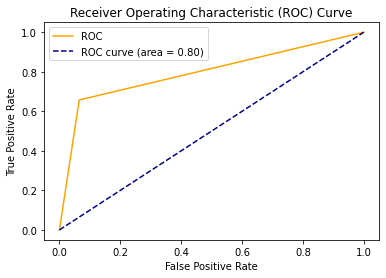

In [186]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Feature Importance

In [187]:
model_xgb.feature_importances_

array([0.02561562, 0.0157109 , 0.01482938, 0.05924042, 0.51358324,
       0.04349525, 0.02667557, 0.01592111, 0.03078043, 0.13975154,
       0.06669301, 0.03220509, 0.01549845], dtype=float32)

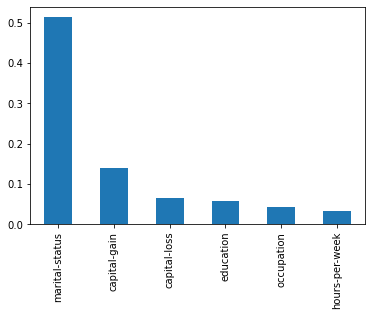

In [188]:
feat_importances = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()